In [1]:
using SatelliteDynamics
using DelimitedFiles
using LinearAlgebra
using Plots

In [2]:
#rework this
coef = SatelliteDynamics.load_gravity_model_file("lunar_gravity_models/lunar_grav.gfc")
# SatelliteDynamics.load_gravity_model(:EGM2008_20)

GravModel("GrazLGM420b", true, 1.738e6, 0.0, 420, 420, [1.0 0.0 … 3.548625583322e-9 4.923211710615e-10; 0.0 0.0 … 2.822982754482e-10 -3.442109534423e-9; … ; 1.840706368e-9 5.29701606322e-9 … -1.820234236853e-9 -3.146651912671e-9; -1.118761944702e-9 -2.525191577477e-10 … 4.349041272936e-9 -2.03260613524e-9])

In [3]:
GRAVITY_MODEL.GM

0.0

In [4]:
GRAVITY_MODEL.data

421×421 Matrix{Float64}:
  1.0           0.0           7.77789e-10  …   3.54863e-9    4.92321e-10
  0.0           0.0          -8.36043e-11      2.82298e-10  -3.44211e-9
 -9.08617e-5   -2.54762e-9    3.46727e-5       1.57722e-9   -2.45955e-9
 -3.19681e-6    2.63671e-5    1.41712e-5      -2.01217e-9   -6.35865e-10
  3.23479e-6   -6.01362e-6   -7.11636e-6       1.64049e-9    1.70658e-10
 -2.23806e-7   -1.0116e-6     4.39952e-6   …   4.33167e-9   -2.4866e-10
  3.81843e-6    1.52823e-6   -4.39732e-6      -1.38055e-9   -5.64383e-9
  5.59344e-6    7.47165e-6   -6.50164e-7      -4.70299e-9   -4.86024e-9
  2.34684e-6    4.18476e-9    3.00932e-6      -4.57147e-9   -2.4595e-9
 -3.5309e-6     1.867e-6      1.9278e-6        3.88653e-10  -2.94999e-9
  ⋮                                        ⋱                 ⋮
  3.86823e-9    2.27853e-10   1.05113e-9       2.80218e-9   -4.16136e-10
 -2.15706e-10  -2.86514e-9    9.6129e-10       3.27965e-9    9.22969e-10
  7.71908e-10  -9.66959e-10   1.53503e-9    

In [5]:
# function spherical_harmonic_gravity(r::AbstractArray{<:Real, 1}, coef::AbstractArray{<:Real, 2}, n_max::Integer, m_max::Integer, r_ref::Real, GM::Real; normalized::Bool=true)
# a = accel_gravity(1840*1000*randn(3),Diagonal(ones(3)),30,30)
a = SatelliteDynamics.spherical_harmonic_gravity(1740*1000randn(3), GRAVITY_MODEL.data, 30, 30, GRAVITY_MODEL.R, 4.9048695e12)

3-element Vector{Float64}:
 -0.024695819367573663
 -0.4759433214996036
 -0.16722141141549182

In [40]:
function lunar_orbit_dynamics(t, x)
    r = x[1:3]
    v = x[4:6]
    a = SatelliteDynamics.spherical_harmonic_gravity(r, GRAVITY_MODEL.data, 60, 60, GRAVITY_MODEL.R, 4.9048695e12)
    return [v; a]
end

lunar_orbit_dynamics (generic function with 1 method)

In [7]:
function rkstep(t,x,Δt)
    k1 = Δt*lunar_orbit_dynamics(t,x)
    k2 = Δt*lunar_orbit_dynamics(t+Δt/2, x+k1/2)
    k3 = Δt*lunar_orbit_dynamics(t+Δt/2, x+k2/2)
    k4 = Δt*lunar_orbit_dynamics(t+Δt, x+k3)
    return x + (k1 + 2k2 + 2k3 + k4)/6
end

rkstep (generic function with 1 method)

In [36]:
r0 = 1840*1000*randn(3)
v0 = 1000*randn(3)
x0 = [r0; v0]

6-element Vector{Float64}:
      1.1838266017172292e6
     -1.965287530841092e6
 369585.05045234493
   1201.33594295192
    457.9680115150248
    834.50339135741

In [45]:
Tfinal = 1000*45*60;
Δt = 10
thist = 0:Δt:Tfinal;
x_sim = zeros(6,length(thist));
x_sim[:,1] .= x0;
for k = 1:(length(thist)-1)
    x_sim[:,k+1] .= rkstep(thist[k],x_sim[:,k],Δt);
end

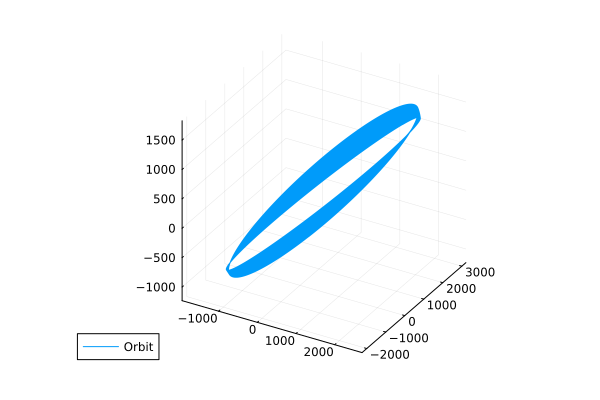

In [46]:
plot(x_sim[1,:]/1000, x_sim[2,:]/1000, x_sim[3,:]/1000, label="Orbit")